# Importing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
test = pd.read_csv("test.csv")

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

# Splitting Training Dataset

We will split the training dataset to make sure if the model is not overfitting.

In [6]:
from sklearn.model_selection import train_test_split

y = train.label

x = train.drop("label", axis=1)
x = np.array(x, dtype=np.float32)/255
x = x.reshape(-1,28,28,1)

x_train, x_valid, y_train, y_valid = train_test_split(x,y, random_state=1, test_size=0.2)

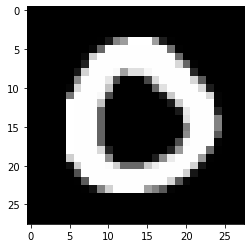

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x[4], cmap='gray')
plt.show()

# Building the CNN

In [8]:
import tensorflow as tf

def build_model():
    model = tf.keras.Sequential([
    
        tf.keras.layers.Conv2D(filters=24, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=36, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
    
    return model

In [9]:
model = build_model()
model.build(input_shape=x_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (33600, 26, 26, 24)       240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (33600, 13, 13, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (33600, 11, 11, 36)       7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (33600, 5, 5, 36)         0         
_________________________________________________________________
flatten (Flatten)            (33600, 900)              0         
_________________________________________________________________
dense (Dense)                (33600, 128)              115328    
_________________________________________________________________
dense_1 (Dense)              (33600, 10)               1

In [10]:
batch_size = 32
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1974 - accuracy: 0.9423
Epoch 2/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 3/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0408 - accuracy: 0.9868
Epoch 4/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 5/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 6/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 7/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0140 - accuracy: 0.9952
Epoch 8/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0109 - accuracy: 0.9961
Epoch 9/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 10/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0

In [11]:
valid_loss, valid_acc = model.evaluate(x_valid, y_valid)
print("Validation accuracy: %.4f" %valid_acc)

263/263 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9856
Validation accuracy: 0.9856


As we can see, the model isn't overfitting. So we will train again with full data.

In [12]:
model_full = build_model()
model_full.fit(x, y, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1746 - accuracy: 0.9477
Epoch 2/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0567 - accuracy: 0.9821
Epoch 3/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0394 - accuracy: 0.9870
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0306 - accuracy: 0.9905
Epoch 5/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 6/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 7/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0140 - accuracy: 0.9950
Epoch 8/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 9/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 10/10
1313/1313 [==============================] - 12s 9ms/step

# Predicting

In [13]:
x_test = np.array(test, dtype=np.float32)/255
x_test = x_test.reshape(-1,28,28,1)

In [14]:
preds = model.predict(x_test)
preds

array([[2.9357640e-14, 3.5575858e-13, 1.0000000e+00, ..., 6.4029760e-13,
        2.0250427e-12, 9.7677959e-15],
       [1.0000000e+00, 5.5342681e-17, 3.4223636e-15, ..., 4.7885648e-15,
        1.8637837e-14, 1.3193074e-12],
       [1.3061388e-12, 1.1091670e-13, 1.8753943e-09, ..., 1.9117594e-09,
        4.5943702e-06, 9.9999535e-01],
       ...,
       [3.7152191e-25, 4.2875463e-16, 3.1524531e-17, ..., 1.5671329e-14,
        2.2217729e-15, 4.6099097e-14],
       [7.9327760e-12, 6.0482099e-13, 3.4930584e-13, ..., 1.8065278e-07,
        1.5805982e-09, 9.9996805e-01],
       [6.4096868e-16, 2.2429997e-14, 1.0000000e+00, ..., 5.9272174e-14,
        3.6366468e-10, 4.0348838e-15]], dtype=float32)

In [15]:
preds.shape

(28000, 10)

In [16]:
preds = (np.argmax(preds, axis=1))

In [17]:
example = pd.read_csv("sample_submission.csv")
example.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# Submission

In [18]:
submission = pd.DataFrame({
    "ImageId":test.index+1,
    "Label":preds
})

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [19]:
submission.to_csv("submission.csv", index=False)